#Task:
1. Accept a user's name, age, and a list of their skills
2. pass the state through three nodes that:
    . first node: name with greeting
    . second node: describes the user's age
    . third node:lists the user's skills in formatted string

3. the final output in the result field should be a combined message in this format:


output: "alice, welcome to the system.you are 31 years old. you have skills in python, ml, and langgraph."

In [19]:
from typing import TypedDict
from langgraph.graph import StateGraph  #framework the helps you design and manage the flow of the tasks in app using graph

In [28]:
#shared data structure that keep track of the information in app
class AgentState(TypedDict): #state schema 
    name : str
    age : str
    skill: str
    final: str



In [33]:
def first_node(state: AgentState) -> AgentState:
    """This is the 1st node of sequence"""
    state["final"] = f"{state['name']}, Welcome to the system. "
    return state

# 3. Second node
def second_node(state: AgentState) -> AgentState:
    """This is the 2nd node of sequence"""
    state["final"] = state["final"] + f" you are {state['age']} years old."
    return state


def skill_node(state: AgentState) -> AgentState:
    """This is the 2nd node of sequence"""
    state["final"] = state["final"] + f" you have skills in: {state['skill']}"
    return state


In [34]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("skill_node", skill_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "skill_node")
graph.set_finish_point("second_node")

app = graph.compile()

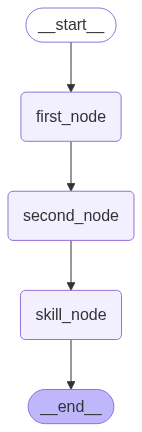

In [35]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
ans = app.invoke({"name" : "Bob", "age": "20", "skill": "Python, ml, langgraph"})
print(ans["final"])

Bob, Welcome to the system.  you are 20 years old. you have skills in: Python, ml, langgraph
